##### 1) Introduction

Import Libraries

Load data

Run Statistical summaries

Figure out missing value columns

##### 2) Visualizations

Correlation with target variable

##### 3) Missing values imputation

train data Missing columns- Embarked,Age,Cabin

test data Missing columns- Age and Fare

##### 4) Feature Engineering

Calculate total family size

Get title from name

Find out which deck passenger belonged to

Dealing with Categorical Variables

Label encoding

Feature Scaling

##### 5) Prediction

Split into training & test sets

Build the model

Feature importance

Predictions

Ensemble : Majority voting


##### 6) Submission

# Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

import re

%matplotlib inline

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import Ridge, LogisticRegressionCV, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

Using TensorFlow backend.


# Load Data

In [2]:
#Load Data
train = pd.read_csv('train.csv', index_col= 'PassengerId')
test = pd.read_csv('test.csv', index_col= 'PassengerId')

In [3]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [4]:
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


# Run Statistical Summaries

In [5]:
print(train.info())
print('_'*50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object


In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


 Missing values:
'Age', 'Embarked', and 'Cabin' columns for training and test data
 
 1 missing value for 'Fare' in test data

# Visualization

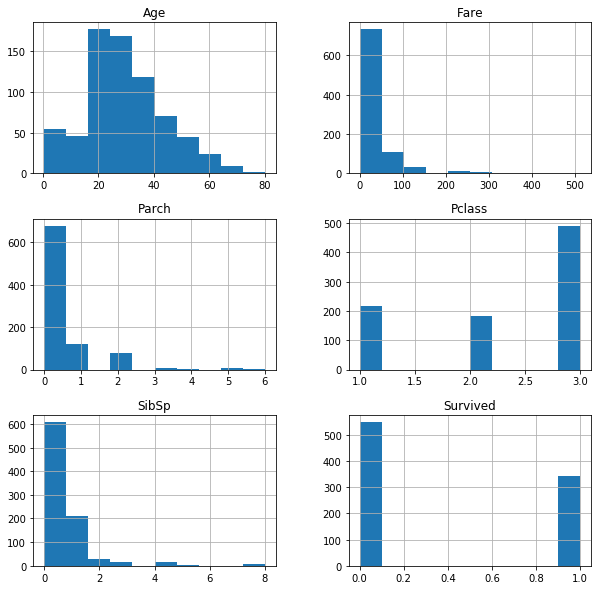

In [8]:
train.hist(figsize= (10,10))
plt.show()

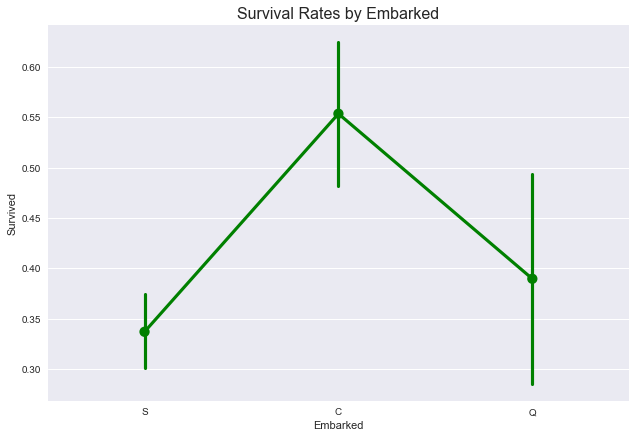

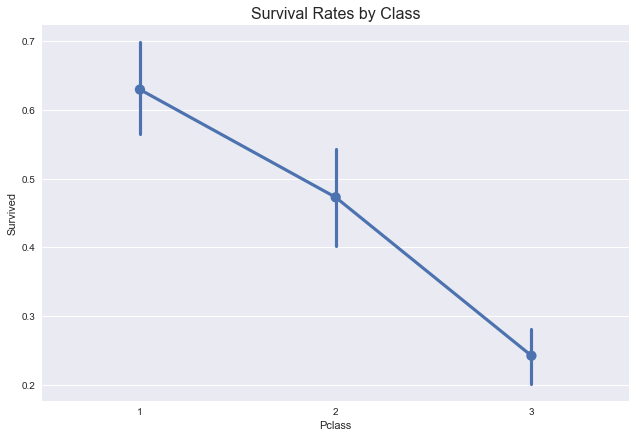

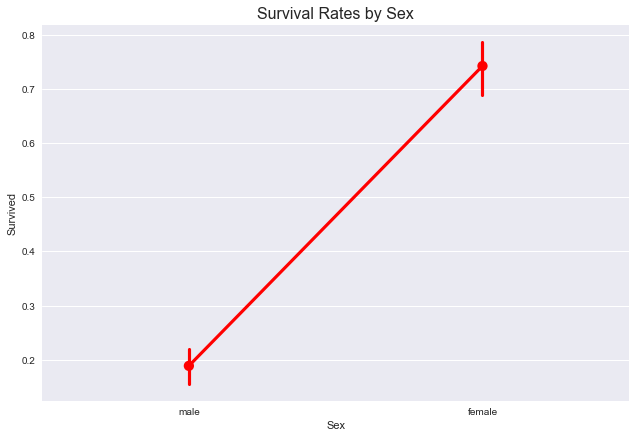

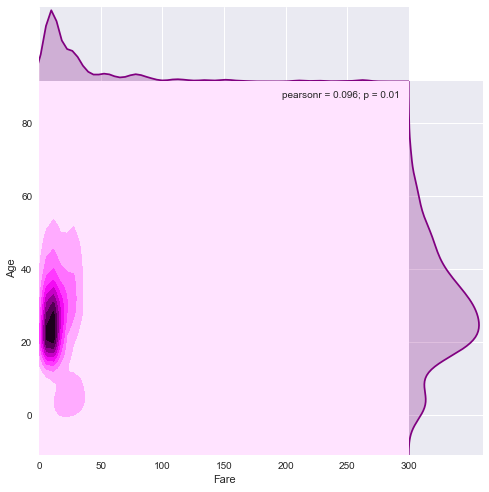

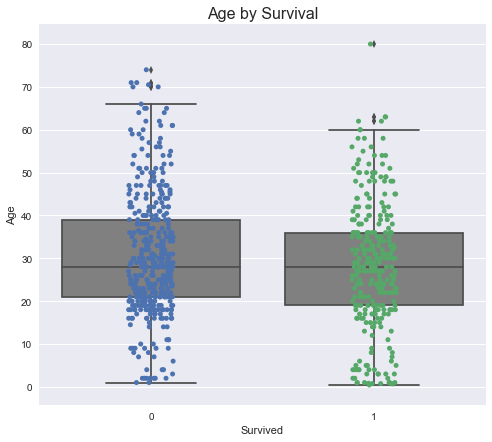

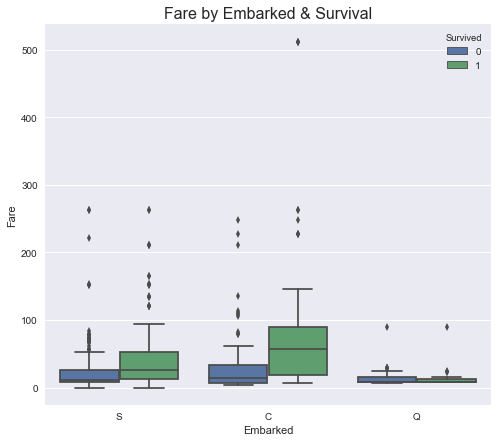

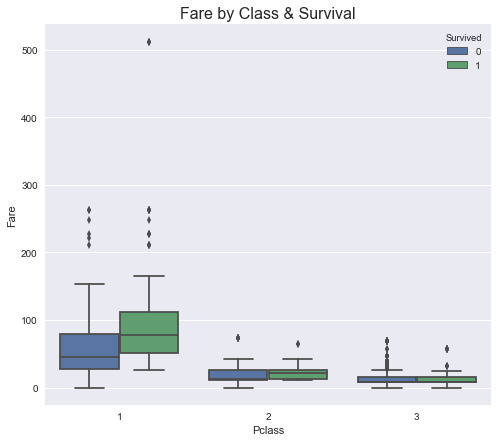

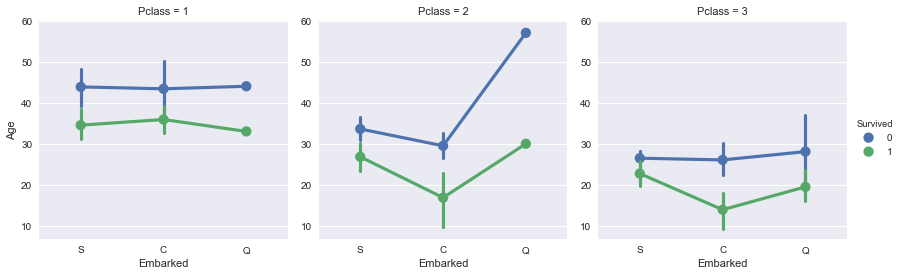

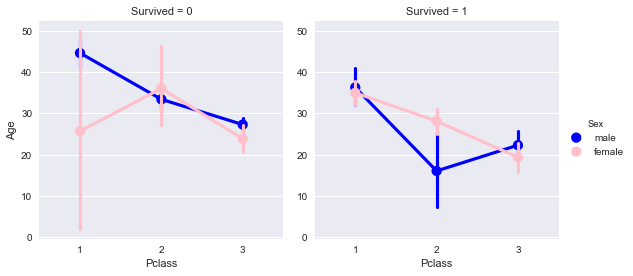

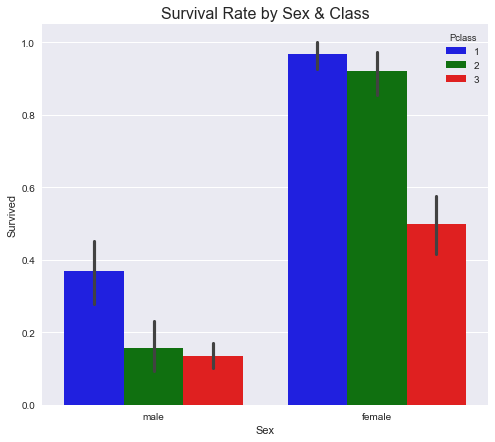

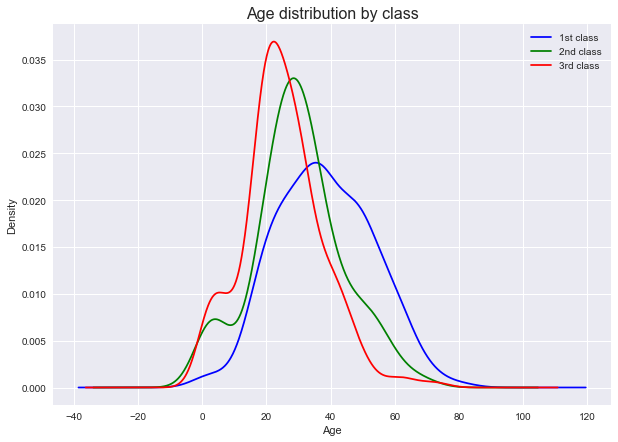

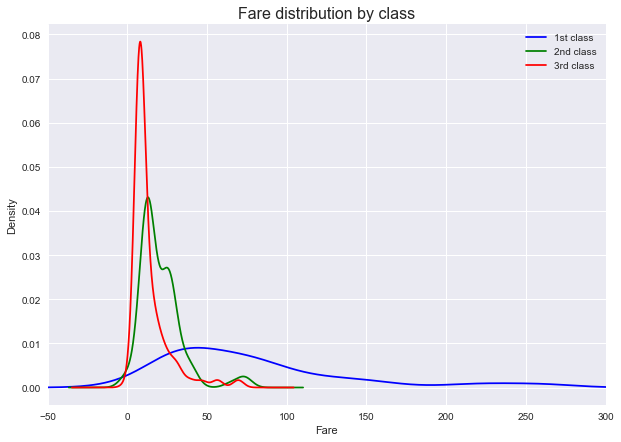

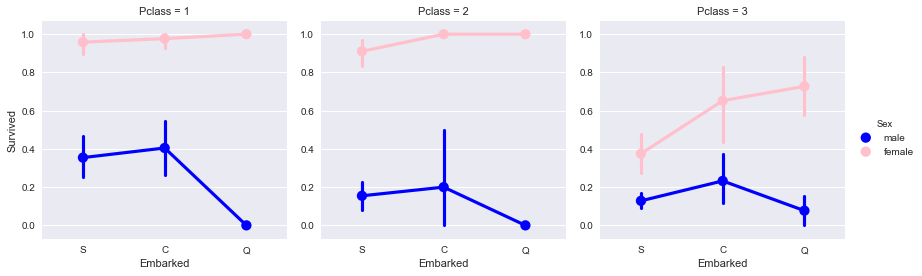

In [9]:
sns.set()

sns.factorplot(x= 'Embarked', y= 'Survived', data= train, size= 6, aspect= 1.5, color= 'g')
plt.title('Survival Rates by Embarked', fontsize= 16)
plt.show()

sns.factorplot(x= 'Pclass', y= 'Survived', data= train, size= 6, aspect= 1.5)
plt.title('Survival Rates by Class', fontsize= 16)
plt.show()

sns.factorplot(x= 'Sex', y= 'Survived', data= train, size= 6, aspect= 1.5, color= 'r')
plt.title('Survival Rates by Sex', fontsize= 16)
plt.show()

sns.jointplot('Fare', 'Age', data= train, kind= 'kde', xlim= (0,300), space= 0, size= 7, color= 'purple')
plt.show()

fig, ax = plt.subplots(figsize= (8,7))
ax = sns.boxplot(x= 'Survived', y= 'Age', data= train, color= 'gray')
ax = sns.stripplot(x= 'Survived', y= 'Age', data= train, jitter= True)
plt.title('Age by Survival', fontsize= 16)
plt.show()

fig, ax = plt.subplots(figsize= (8,7))
ax = sns.boxplot(x= 'Embarked', y= 'Fare', data= train, hue= 'Survived')
##ax = sns.stripplot(x= 'Embarked', y= 'Fare', data= train, hue= 'Survived', jitter= True, dodge= True)
plt.title('Fare by Embarked & Survival', fontsize= 16)
plt.show()

fig, ax = plt.subplots(figsize= (8,7))
ax = sns.boxplot(x= 'Pclass', y= 'Fare', data= train, hue= 'Survived')
plt.title('Fare by Class & Survival', fontsize= 16)
plt.show()

sns.factorplot(x= 'Embarked', y='Age', col= 'Pclass', hue= 'Survived', data= train)
plt.show()

sns.factorplot('Pclass', 'Age', data= train, hue= 'Sex', col= 'Survived', kind= 'point', palette= ['blue', 'pink'])
plt.show()

fig, ax = plt.subplots(figsize= (8,7))
sns.barplot(x= 'Sex', y= 'Survived', data= train, hue= 'Pclass', palette= ['blue', 'green', 'red'])
plt.title('Survival Rate by Sex & Class', fontsize= 16)
plt.show()

fig, ax = plt.subplots(figsize= (10,7))
ax = train['Age'][train['Pclass'] == 1].plot(kind= 'kde', color= 'blue')
ax = train['Age'][train['Pclass'] == 2].plot(kind= 'kde', color= 'green')
ax = train['Age'][train['Pclass'] == 3].plot(kind= 'kde', color= 'red')
plt.xlabel('Age')
plt.title('Age distribution by class', fontsize= 16)
plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

fig, ax = plt.subplots(figsize= (10,7))
ax = train['Fare'][(train['Pclass'] == 1) & (train['Fare'] < 300)].plot(kind= 'kde', color= 'blue')
ax = train['Fare'][train['Pclass'] == 2].plot(kind= 'kde', color= 'green')
ax = train['Fare'][train['Pclass'] == 3].plot(kind= 'kde', color= 'red')
plt.xlabel('Fare')
plt.xlim(-50,300)
plt.title('Fare distribution by class', fontsize= 16)
plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

sns.factorplot(x= 'Embarked', y= 'Survived', data= train, col= 'Pclass', hue= 'Sex', palette= ['blue', 'pink'])
plt.show()

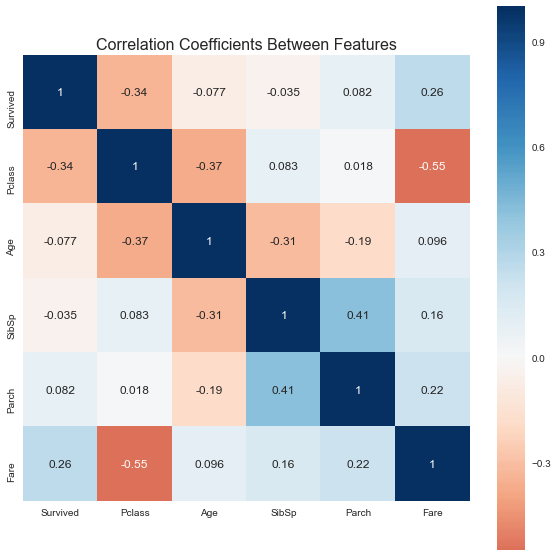

Correlation to Target Variable:
 Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64


In [10]:
corr = train.corr()
plt.figure(figsize= (10,10))
sns.heatmap(corr, annot= True, square= True, center= 0, cmap= 'RdBu')
plt.title('Correlation Coefficients Between Features', fontsize= 16)
plt.show()

print('Correlation to Target Variable:\n', train.corr()['Survived'])

# Imputing Missing Values

Recall that for our training data, we have missing values for 'Embarked', 'Age', and 'Cabin' columns

For our test data, we have missing values for 'Age', 'Cabin', and 'Fare'

In [11]:
# Find rows in training data where 'Embarked' is null
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We can see that the two passengers with missing values for 'Embarked' both had a 'Fare' of $80 and are 1st class tickets. So we will use a chart to see if we can get insight into which port they Embarked from

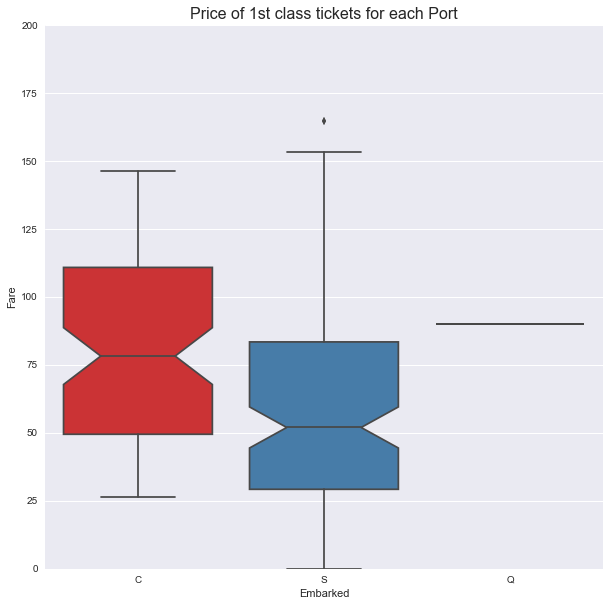

In [12]:
plt.figure(figsize= (10,10))
sns.boxplot('Embarked', 'Fare', data= train[train.Pclass == 1], notch= True, palette= 'Set1')
plt.title('Price of 1st class tickets for each Port', fontsize= 16)
plt.ylim(0,200)
plt.show()

We will fill these missing values with 'C' since the median value for 'Fare' on 1st class tickets for that port is right at $80, so that is our best estimate of the correct 'Embarked' value

In [13]:
train.Embarked = train.Embarked.fillna('C')

In [14]:
# Find how many rows in the training data have missing values for 'Age'
train[train['Age'].isnull()].shape[0]

177

In [15]:
# Find how many rows in the test data have missing values for 'Age'
test[test['Age'].isnull()].shape[0]

86

There are 177 missing values in the 'Age' column for the training data, so we will predict these missing values later rather than filling in each individual value separately

Same thing applies for the test set

In [16]:
print(train[train['Cabin'].isnull()].shape[0],'out of', train.shape[0], 'values are missing in "Cabin" column for training set')
print(test[test['Cabin'].isnull()].shape[0],'out of', test.shape[0], 'values are missing in "Cabin" column for test set')

687 out of 891 values are missing in "Cabin" column for training set
327 out of 418 values are missing in "Cabin" column for test set


For the 'Cabin' column, a large majority of these values are missing, so we will not fill in those missing values, but rather extract some information from this column in the Feature Engineering section

In [17]:
# Find rows in the test set where 'Fare' is null
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


For our missing value in the 'Fare' column of the test data, we should be able to impute the Fare based on where the passenger Embarked from and his Class of ticket and using the median value:

We will fill in this value as the median value of 'Fare' for tickets Embarking from 'S' and are in the 3rd class

In [18]:
comparable = test[(test['Pclass'] == 3) & (test['Embarked'] == 'S')]
test['Fare'] = test['Fare'].fillna(comparable.Fare.median())

test.loc[1044,:]

Pclass                       3
Name        Storey, Mr. Thomas
Sex                       male
Age                       60.5
SibSp                        0
Parch                        0
Ticket                    3701
Fare                      8.05
Cabin                      NaN
Embarked                     S
Name: 1044, dtype: object

Confirmed the missing value has been filled with the median value of $8.05

# Feature Engineering

We will add a new column 'Family' representing the total number of family members onboard with each passenger

In [19]:
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']

train.Family.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

We can separate these into distinct groups and create a new column based on the size of the Family

In [20]:
train.loc[train.Family == 0, 'Family_size'] = 'alone'
train.loc[(train.Family >= 1) & (train.Family < 5), 'Family_size'] = 'small'
train.loc[train.Family >= 5, 'Family_size'] = 'large'

print(train.Family_size.value_counts(), '\n')

test.loc[test.Family == 0, 'Family_size'] = 'alone'
test.loc[(test.Family >= 1) & (test.Family < 5), 'Family_size'] = 'small'
test.loc[test.Family >= 5, 'Family_size'] = 'large'

print(test.Family_size.value_counts())

alone    537
small    307
large     47
Name: Family_size, dtype: int64 

alone    253
small    152
large     13
Name: Family_size, dtype: int64


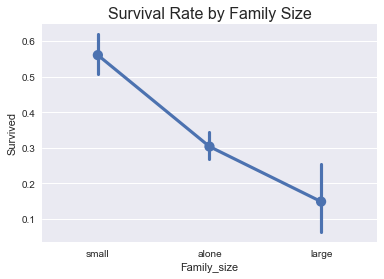

In [21]:
sns.pointplot('Family_size', 'Survived', data= train)
plt.title('Survival Rate by Family Size', fontsize= 16)
plt.show()

We can add a new column 'Deck' representing where the passengers are located on the ship and extract this data from the 'Cabin' information

In [22]:
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]
train.Deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

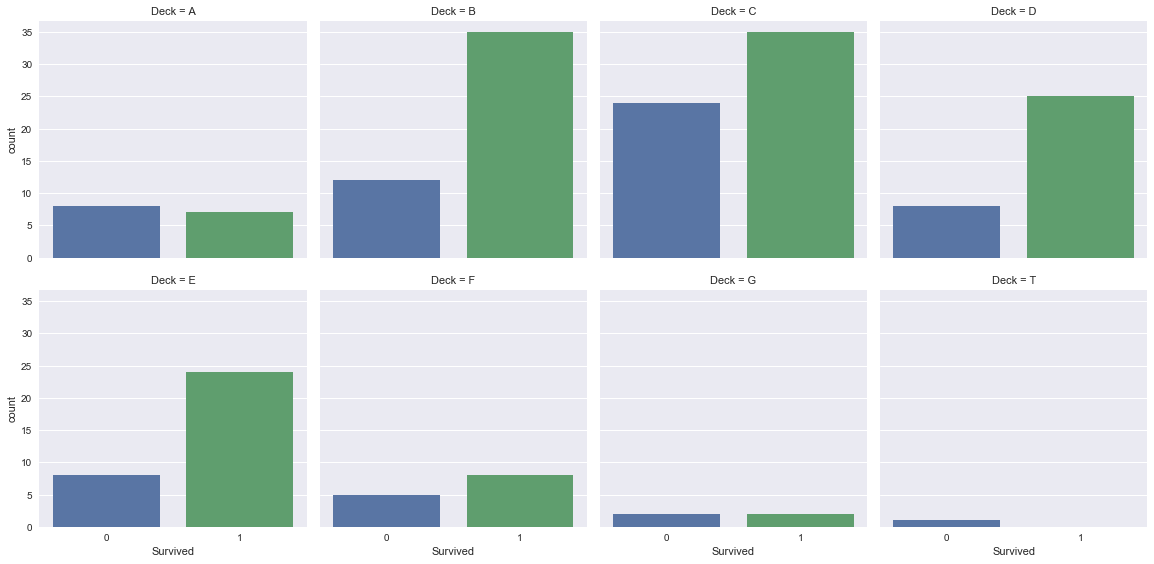

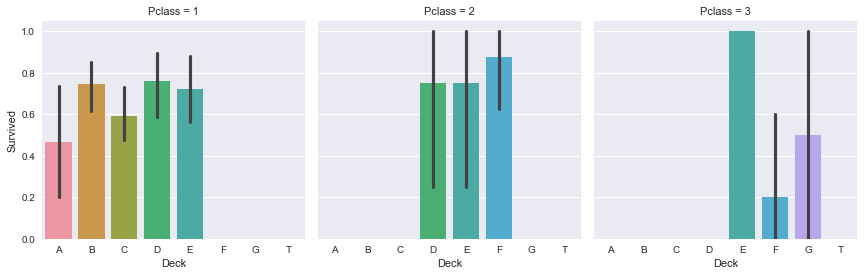

In [23]:
train = train.sort_values('Deck')

sns.factorplot('Survived', data= train, col= 'Deck', kind= 'count', col_wrap= 4)
plt.show()

sns.factorplot(x= 'Deck', y= 'Survived', data= train, col= 'Pclass', col_wrap= 4, kind= 'bar')
plt.show()

In [24]:
train['Deck'] = train['Deck'].fillna('Y')
test['Deck'] = test['Deck'].fillna('Y')
train.sort_index(inplace= True)

We now define a function that will be able to search the name for a Title such as: Mr. or Mrs.

We then apply that function over the 'Name' column and fill in the corresponding title to the newly created 'Title' column

In [25]:
def title_search(name):
    match = re.search('[A-Za-z]+\.', name)
    if match:
        return match.group()

    
train['Title'] = train['Name'].apply(title_search)
train['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Jonkheer.      1
Countess.      1
Capt.          1
Mme.           1
Ms.            1
Lady.          1
Sir.           1
Don.           1
Name: Title, dtype: int64

We'll need to reduce the number of categories of this column by combining the uncommon ones into the same category

In [26]:
train.loc[train['Title'] == 'Dr.', 'Title'] = 'uncommon'
train.loc[train['Title'] == 'Rev.', 'Title'] = 'uncommon'
train.loc[train['Title'] == 'Major.', 'Title'] = 'uncommon'
train.loc[train['Title'] == 'Mlle.', 'Title'] = 'Miss.'
train.loc[train['Title'] == 'Col.', 'Title'] = 'uncommon'
train.loc[train['Title'] == 'Capt.', 'Title'] = 'uncommon'
train.loc[train['Title'] == 'Sir.', 'Title'] = 'uncommon'
train.loc[train['Title'] == 'Jonkheer.', 'Title'] = 'uncommon'
train.loc[train['Title'] == 'Lady.', 'Title'] = 'uncommon'
train.loc[train['Title'] == 'Ms.', 'Title'] = 'Miss.'
train.loc[train['Title'] == 'Don.', 'Title'] = 'uncommon'
train.loc[train['Title'] == 'Mme.', 'Title'] = 'Mrs.'
train.loc[train['Title'] == 'Countess.', 'Title'] = 'uncommon'

train['Title'].value_counts()

Mr.         517
Miss.       185
Mrs.        126
Master.      40
uncommon     23
Name: Title, dtype: int64

In [27]:
test['Title'] = test['Name'].apply(title_search)

test.loc[test['Title'] == 'Dr.', 'Title'] = 'uncommon'
test.loc[test['Title'] == 'Rev.', 'Title'] = 'uncommon'
test.loc[test['Title'] == 'Major.', 'Title'] = 'uncommon'
test.loc[test['Title'] == 'Mlle.', 'Title'] = 'Miss.'
test.loc[test['Title'] == 'Col.', 'Title'] = 'uncommon'
test.loc[test['Title'] == 'Capt.', 'Title'] = 'uncommon'
test.loc[test['Title'] == 'Sir.', 'Title'] = 'uncommon'
test.loc[test['Title'] == 'Jonkheer.', 'Title'] = 'uncommon'
test.loc[test['Title'] == 'Lady.', 'Title'] = 'uncommon'
test.loc[test['Title'] == 'Ms.', 'Title'] = 'Miss.'
test.loc[test['Title'] == 'Dona.', 'Title'] = 'uncommon'
test.loc[test['Title'] == 'Mme.', 'Title'] = 'Mrs.'
test.loc[test['Title'] == 'Countess.', 'Title'] = 'uncommon'

test['Title'].value_counts()

Mr.         240
Miss.        79
Mrs.         72
Master.      21
uncommon      6
Name: Title, dtype: int64

We will also create a column to reflect the length of the passenger's name, since there may be a correlation to name length and importance of the person, so they may have more influence on their own survival

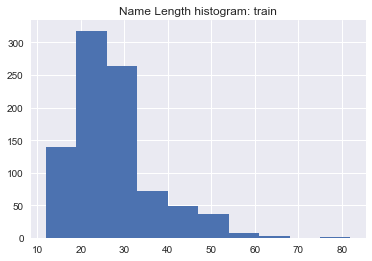

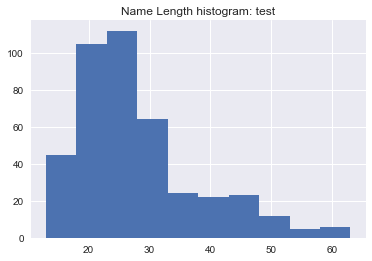

In [28]:
train['Name_Length'] = train['Name'].apply(lambda x: len(x))
test['Name_Length'] = test['Name'].apply(lambda x: len(x))

plt.hist(train['Name_Length'])
plt.title('Name Length histogram: train')
plt.show()

plt.hist(test['Name_Length'])
plt.title('Name Length histogram: test')
plt.show()

In [29]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Name_Length
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,0.332350
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,-0.220001
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,0.034612
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,0.165019
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,0.252282
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,0.155832
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,0.238820
Name_Length,0.332350,-0.220001,0.034612,0.165019,0.252282,0.155832,0.238820,1.000000


The 'Name_Length' column has a relatively high correlation to our target variable in relation to the other features. Let's add a column that separates those lengths into categories as well

In [30]:
train.loc[train['Name_Length'] < 20, 'Name_Length_cat'] = 'short'
train.loc[(train['Name_Length'] >= 20) & (train['Name_Length'] <= 35), 'Name_Length_cat'] = 'medium'
train.loc[train['Name_Length'] > 35, 'Name_Length_cat'] = 'long'

test.loc[test['Name_Length'] < 20, 'Name_Length_cat'] = 'short'
test.loc[(test['Name_Length'] >= 20) & (test['Name_Length'] <= 35), 'Name_Length_cat'] = 'medium'
test.loc[test['Name_Length'] > 35, 'Name_Length_cat'] = 'long'

train['Name_Length_cat'].value_counts()

medium    553
short     204
long      134
Name: Name_Length_cat, dtype: int64

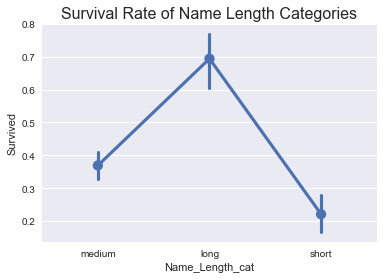

In [31]:
sns.pointplot('Name_Length_cat', 'Survived', data= train)
plt.title('Survival Rate of Name Length Categories', fontsize= 16)
plt.show()

# Dealing with Categorical Variables

For the columns that have categorical values like: 'small', 'medium', 'large', we want to convert those values into numbers so they are more suitable for the learning algorithms

In [32]:
le = LabelEncoder()

cat_vars = ['Sex', 'Embarked', 'Family_size', 'Deck', 'Title', 'Name_Length_cat']

for col in cat_vars:
    train[col] = le.fit_transform(train[col])
    le_map = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_map)
    test[col] = le.fit_transform(test[col])
    le_map = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_map)

{'female': 0, 'male': 1}
{'female': 0, 'male': 1}
{'C': 0, 'Q': 1, 'S': 2}
{'C': 0, 'Q': 1, 'S': 2}
{'alone': 0, 'large': 1, 'small': 2}
{'alone': 0, 'large': 1, 'small': 2}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'Y': 8}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'Y': 7}
{'Master.': 0, 'Miss.': 1, 'Mr.': 2, 'Mrs.': 3, 'uncommon': 4}
{'Master.': 0, 'Miss.': 1, 'Mr.': 2, 'Mrs.': 3, 'uncommon': 4}
{'long': 0, 'medium': 1, 'short': 2}
{'long': 0, 'medium': 1, 'short': 2}


The mapping is the same for the training set and test set except for the 'Deck' column

There are no values of 'T' in the test set for 'Deck' so the coding is off by 1 value.

This will be fixed by changing all the '7's in the test set to '8's so they are consistent across dataframes

In [33]:
test.loc[test['Deck'] == 7, 'Deck'] = 8

# Imputing Age by Ridge Regression

In [34]:
def impute_age(df):
    # Features used:
    age_df = df[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family', 'Family_size', 'Deck', 
             'Title', 'Name_Length', 'Name_Length_cat']]
    
    # Split data into train/test based on if Age is missing or not
    train = age_df.loc[age_df['Age'].notnull()]
    test = age_df.loc[age_df['Age'].isnull()]
    
    y = train.values[:, 0]
    X = train.values[:, 1:]
    
    # Fit model and Predict
    reg = Ridge(alpha= 0.5)
    reg.fit(X, y)
    predicted_ages = reg.predict(test.values[:, 1:])
    score = reg.score(X,y)
    
    # Fill in values in original DataFrame and print score
    df.loc[df['Age'].isnull(), 'Age'] = predicted_ages
    print('R^2: ', score)
    return df

train = impute_age(train)
test = impute_age(test)

R^2:  0.415550998304
R^2:  0.435959851652


# Feature Scaling

In [35]:
scaler = RobustScaler()
train[['Age', 'Fare', 'Name_Length']] = scaler.fit_transform(train[['Age', 'Fare', 'Name_Length']])
test[['Age', 'Fare', 'Name_Length']] = scaler.fit_transform(test[['Age', 'Fare', 'Name_Length']])

Correlation with Target Variable, 'Survived':

In [36]:
train.corr()['Survived']

Survived           1.000000
Pclass            -0.338481
Sex               -0.543351
Age               -0.071738
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
Embarked          -0.174199
Family             0.016639
Family_size        0.239245
Deck              -0.301116
Title             -0.071174
Name_Length        0.332350
Name_Length_cat   -0.282842
Name: Survived, dtype: float64

# Machine Learning Algorithms

We will go through many different Machine Learning algorithms with their default parameters, then use RFECV to do feature selection, and then use GridSearchCV for hyper-parameter tuning for each of these algorithms

In [37]:
# Features used:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family', 
              'Family_size', 'Deck', 'Title', 'Name_Length', 'Name_Length_cat']

target = 'Survived'

X = train[predictors]
y = train[target]


# Split data in cross-validation using ShuffleSplit: run the model 25x with a 70/30 split
cv_split = ShuffleSplit(n_splits= 25, test_size= 0.3, train_size= 0.7, random_state= 1)
cv_results = {}

#### Logistic Regression

This will be used as the base model for this classification problem and will be used to determine a baseline score for our feature importances to get an idea of what features are deemed important or not important based on this model

In [38]:
# Run Logistic Regression model on training data and report results
alg = LogisticRegressionCV()
alg.fit(X,y)
#y_predicted = clf.predict(X)
#scores = clf.score(X,y)

cv_results = cross_validate(alg, X, y, cv= cv_split)


print('Test Accuracy:', cv_results['test_score'].mean())
#print(classification_report(y, y_predicted))
#print(confusion_matrix(y, y_predicted))

Test Accuracy: 0.806268656716


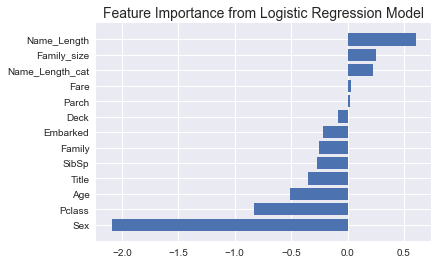

In [39]:
feature_rank = alg.coef_[0]
indices = np.argsort(feature_rank)
sorted_features = []
for i in indices:
    sorted_features.append(predictors[i])
plt.barh(np.arange(13), feature_rank[indices], tick_label= sorted_features)
plt.title('Feature Importance from Logistic Regression Model', fontsize= 14)
plt.show()

^^ Explain chart **



Now we will run the same model, but use scikit learn's RFECV feature (Feature Ranking with recursive feature elimination and cross-validated selection of the best number of features) to determine which features to use in the model

In [40]:
alg = LogisticRegressionCV()
selector = RFECV(alg, cv= cv_split, scoring= 'accuracy')
X_new = selector.fit_transform(X, y)
#########

#clf.fit(X_new, y)
#y_predicted = clf.predict(X_new)
#scores = clf.score(X_new, y)


mask = selector.get_support()
columns = dict(zip(predictors, mask))
print('Features Removed:')
for key, value in columns.items():
    if columns[key] == False:
        print(key)

cv_results = cross_validate(alg, X_new, y, cv= cv_split)
print('Test Accuracy:', cv_results['test_score'].mean())

#print("")
#print('Accuracy: ', scores)
#print(classification_report(y, y_predicted))
#print(confusion_matrix(y, y_predicted))

Features Removed:
Parch
Fare
Deck
Test Accuracy: 0.812388059701


Hyper-parameter tuning

In [41]:
#clf = LogisticRegressionCV()
#selector = RFECV(clf, cv= cv_split, scoring= 'accuracy')
#X_new = selector.fit_transform(X, y)
param_grid = {'max_iter': [5000], 
              'solver': ['newton-cg', 'saga', 'liblinear', 'sag', 'lbfgs'], 
              'fit_intercept': [True, False], 
              'random_state': [1]}
tuned_model = GridSearchCV(alg, param_grid= param_grid, scoring= 'accuracy', cv= cv_split, n_jobs= -1)
tuned_model.fit(X_new, y)

print(tuned_model.best_params_)
print(tuned_model.cv_results_['mean_test_score'][tuned_model.best_index_])
best_params = tuned_model.best_params_
logreg = alg.set_params(**best_params)
logregX = X_new

{'fit_intercept': True, 'max_iter': 5000, 'random_state': 1, 'solver': 'newton-cg'}
0.812388059701


#### Random Forest

In [42]:
# Base Model
alg = RandomForestClassifier(random_state= 1)
alg.fit(X,y)
cv_results = cross_validate(alg, X, y, cv= cv_split)
print('Base Model')
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Model using RFECV Feature Selection
selector = RFECV(alg, cv= cv_split, scoring= 'accuracy')
X_new = selector.fit_transform(X, y)
print('RFECV Model')
mask = selector.get_support()
columns = dict(zip(predictors, mask))
print('Features Removed:')
for key, value in columns.items():
    if columns[key] == False:
        print(key)

cv_results = cross_validate(alg, X_new, y, cv= cv_split)
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Hyper-parameter tuning model using RFECV feature selections
print('RFECV with Hyper-parameter tuning')
param_grid = {'n_estimators': [10,25,50,75,100], 
              'criterion': ['gini', 'entropy'], 
              'bootstrap': [True], 
              'random_state': [1],
              'warm_start': [True]}
tuned_model = GridSearchCV(alg, param_grid= param_grid, scoring= 'accuracy', cv= cv_split, n_jobs= -1)
tuned_model.fit(X_new, y)

print('Best Parameters:\n', tuned_model.best_params_)
print('Test Accuracy:', tuned_model.cv_results_['mean_test_score'][tuned_model.best_index_])
best_params = tuned_model.best_params_
rf = alg.set_params(**best_params)
rfX = X_new

Base Model
Test Accuracy: 0.806268656716
--------------------------------------------------
RFECV Model
Features Removed:
Parch
Family_size
Name_Length_cat
Test Accuracy: 0.813731343284
--------------------------------------------------
RFECV with Hyper-parameter tuning
Best Parameters:
 {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 25, 'random_state': 1, 'warm_start': True}
Test Accuracy: 0.819552238806


#### Support Vector Machine (Classification - SVC)

In [43]:
# Base Model
alg = SVC(random_state= 1)
alg.fit(X,y)
cv_results = cross_validate(alg, X, y, cv= cv_split)
print('Base Model')
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Model using RFECV Feature Selection
selector = RFECV(SVC(random_state= 1, kernel= 'linear'), cv= cv_split, scoring= 'accuracy')
X_new = selector.fit_transform(X, y)
print('RFECV Model')
mask = selector.get_support()
columns = dict(zip(predictors, mask))
print('Features Removed:')
for key, value in columns.items():
    if columns[key] == False:
        print(key)

cv_results = cross_validate(alg, X_new, y, cv= cv_split)
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Hyper-parameter tuning model using RFECV feature selections
print('Hyper-parameter tuning')
param_grid = {'C': [0.1,0.5,1,2], 
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'gamma': [0.1, 0.25, 0.5, 0.75, 1.0], 
              'decision_function_shape': ['ovo', 'ovr'], 
              'random_state': [1],
              'probability': [True]}
tuned_model = GridSearchCV(alg, param_grid= param_grid, scoring= 'accuracy', cv= cv_split, n_jobs= -1)
tuned_model.fit(X_new, y)

print('Best Parameters:\n', tuned_model.best_params_)
print('Test Accuracy:', tuned_model.cv_results_['mean_test_score'][tuned_model.best_index_])
best_params = tuned_model.best_params_
svc = alg.set_params(**best_params)
svcX = X_new

Base Model
Test Accuracy: 0.808656716418
--------------------------------------------------
RFECV Model
Features Removed:
Parch
Embarked
Deck
Test Accuracy: 0.818059701493
--------------------------------------------------
Hyper-parameter tuning
Best Parameters:
 {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'poly', 'probability': True, 'random_state': 1}
Test Accuracy: 0.824328358209


#### Stochastic Gradient Descent (SGD)

In [44]:
# Base Model
alg = SGDClassifier(random_state= 1, max_iter= 1000)
alg.fit(X,y)
cv_results = cross_validate(alg, X, y, cv= cv_split)
print('Base Model')
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Model using RFECV Feature Selection
selector = RFECV(alg, cv= cv_split, scoring= 'accuracy')
X_new = selector.fit_transform(X, y)
print('RFECV Model')
mask = selector.get_support()
columns = dict(zip(predictors, mask))
print('Features Removed:')
for key, value in columns.items():
    if columns[key] == False:
        print(key)

cv_results = cross_validate(alg, X_new, y, cv= cv_split)
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Hyper-parameter tuning model using RFECV feature selections
print('RFECV with Hyper-parameter tuning')
param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'], 
              'penalty': ['l1', 'l2'], 
              'fit_intercept': [True], 
              'random_state': [1], 
              'warm_start': [True], 
              'alpha': [1e-6, 0.00001, 0.0001, 0.001], 
              'max_iter': [5000]}
tuned_model = GridSearchCV(alg, param_grid= param_grid, scoring= 'accuracy', cv= cv_split, n_jobs= -1)
tuned_model.fit(X_new, y)

print('Best Parameters:\n', tuned_model.best_params_)
print('Test Accuracy:', tuned_model.cv_results_['mean_test_score'][tuned_model.best_index_])
best_params = tuned_model.best_params_
sgd = alg.set_params(**best_params)
sgdX = X_new

Base Model
Test Accuracy: 0.772388059701
--------------------------------------------------
RFECV Model
Features Removed:
Parch
Fare
Embarked
Deck
Name_Length
Name_Length_cat
Test Accuracy: 0.797313432836
--------------------------------------------------
RFECV with Hyper-parameter tuning
Best Parameters:
 {'alpha': 1e-05, 'fit_intercept': True, 'loss': 'log', 'max_iter': 5000, 'penalty': 'l1', 'random_state': 1, 'warm_start': True}
Test Accuracy: 0.803134328358


#### Gaussian Process Classification

In [45]:
gpc = GaussianProcessClassifier(optimizer= 'fmin_l_bfgs_b', random_state= 1, warm_start= True)
#selector = RFECV(clf, cv= cv_split, scoring= 'accuracy')
#X_new = selector.fit_transform(X, y)
scores = cross_validate(gpc, X_new, y, scoring= 'accuracy', cv= cv_split, return_train_score= True)



scores_df = pd.DataFrame(scores)
print('Accuracy:', scores_df.test_score.mean())

Accuracy: 0.8097014925373134


#### Decision Tree Classification

In [46]:
# Base Model
alg = DecisionTreeClassifier(random_state= 1)
alg.fit(X,y)
cv_results = cross_validate(alg, X, y, cv= cv_split)
print('Base Model')
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Model using RFECV Feature Selection
selector = RFECV(alg, cv= cv_split, scoring= 'accuracy')
X_new = selector.fit_transform(X, y)
print('RFECV Model')
mask = selector.get_support()
columns = dict(zip(predictors, mask))
print('Features Removed:')
for key, value in columns.items():
    if columns[key] == False:
        print(key)

cv_results = cross_validate(alg, X_new, y, cv= cv_split)
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Hyper-parameter tuning model using RFECV feature selections
print('RFECV with Hyper-parameter tuning')
param_grid = {'criterion': ['gini', 'entropy'], 
              'min_samples_split': [2,5,10,0.03,0.05],
              'random_state': [1],
              'presort': [True, False]}
tuned_model = GridSearchCV(alg, param_grid= param_grid, scoring= 'accuracy', cv= cv_split, n_jobs= -1)
tuned_model.fit(X_new, y)

print('Best Parameters:\n', tuned_model.best_params_)
print('Test Accuracy:', tuned_model.cv_results_['mean_test_score'][tuned_model.best_index_])
best_params = tuned_model.best_params_
dt = alg.set_params(**best_params)
dtX = X_new

Base Model
Test Accuracy: 0.755970149254
--------------------------------------------------
RFECV Model
Features Removed:
SibSp
Parch
Family_size
Name_Length_cat
Test Accuracy: 0.762985074627
--------------------------------------------------
RFECV with Hyper-parameter tuning
Best Parameters:
 {'criterion': 'entropy', 'min_samples_split': 0.03, 'presort': True, 'random_state': 1}
Test Accuracy: 0.791044776119


#### Extra Trees Classifier

In [47]:
# Base Model
alg = ExtraTreesClassifier(random_state= 1)
alg.fit(X,y)
cv_results = cross_validate(alg, X, y, cv= cv_split)
print('Base Model')
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Model using RFECV Feature Selection
selector = RFECV(alg, cv= cv_split, scoring= 'accuracy')
X_new = selector.fit_transform(X, y)
print('RFECV Model')
mask = selector.get_support()
columns = dict(zip(predictors, mask))
print('Features Removed:')
for key, value in columns.items():
    if columns[key] == False:
        print(key)

cv_results = cross_validate(alg, X_new, y, cv= cv_split)
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Hyper-parameter tuning model using RFECV feature selections
print('RFECV with Hyper-parameter tuning')
param_grid = {'n_estimators': [100,500,1000], 
              'criterion': ['gini', 'entropy'], 
              'bootstrap': [True],
              'min_samples_split': [5,10,0.03,0.05],
              'random_state': [1],
              'warm_start': [True]}
tuned_model = GridSearchCV(alg, param_grid= param_grid, scoring= 'accuracy', cv= cv_split, n_jobs= -1)
tuned_model.fit(X_new, y)

print('Best Parameters:\n', tuned_model.best_params_)
print('Test Accuracy:', tuned_model.cv_results_['mean_test_score'][tuned_model.best_index_])
best_params = tuned_model.best_params_
et = alg.set_params(**best_params)
etX = X_new

Base Model
Test Accuracy: 0.793432835821
--------------------------------------------------
RFECV Model
Features Removed:
SibSp
Parch
Embarked
Family_size
Name_Length_cat
Test Accuracy: 0.807164179104
--------------------------------------------------
RFECV with Hyper-parameter tuning
Best Parameters:
 {'bootstrap': True, 'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 1000, 'random_state': 1, 'warm_start': True}
Test Accuracy: 0.829402985075


#### AdaBoost Classifier

In [48]:
# Base Model
alg = AdaBoostClassifier(random_state= 1)
alg.fit(X,y)
cv_results = cross_validate(alg, X, y, cv= cv_split)
print('Base Model')
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Model using RFECV Feature Selection
selector = RFECV(alg, cv= cv_split, scoring= 'accuracy')
X_new = selector.fit_transform(X, y)
print('RFECV Model')
mask = selector.get_support()
columns = dict(zip(predictors, mask))
print('Features Removed:')
for key, value in columns.items():
    if columns[key] == False:
        print(key)

cv_results = cross_validate(alg, X_new, y, cv= cv_split)
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Hyper-parameter tuning model using RFECV feature selections
print('RFECV with Hyper-parameter tuning')
param_grid = {'n_estimators': [1500], 
              'learning_rate': [0.001, 0.01, 0.1, 1],
              'random_state': [1],
              'algorithm': ['SAMME', 'SAMME.R']}
tuned_model = GridSearchCV(alg, param_grid= param_grid, scoring= 'accuracy', cv= cv_split, n_jobs= -1)
tuned_model.fit(X_new, y)

print('Best Parameters:\n', tuned_model.best_params_)
print('Test Accuracy:', tuned_model.cv_results_['mean_test_score'][tuned_model.best_index_])
best_params = tuned_model.best_params_
ada = alg.set_params(**best_params)
adaX = X_new

Base Model
Test Accuracy: 0.810895522388
--------------------------------------------------
RFECV Model
Features Removed:
Test Accuracy: 0.810895522388
--------------------------------------------------
RFECV with Hyper-parameter tuning
Best Parameters:
 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 1500, 'random_state': 1}
Test Accuracy: 0.822388059701


#### Gradient Tree Boosting Classifier

In [49]:
# Base Model
alg = GradientBoostingClassifier(random_state= 1)
alg.fit(X,y)
cv_results = cross_validate(alg, X, y, cv= cv_split)
print('Base Model')
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Model using RFECV Feature Selection
selector = RFECV(alg, cv= cv_split, scoring= 'accuracy')
X_new = selector.fit_transform(X, y)
print('RFECV Model')
mask = selector.get_support()
columns = dict(zip(predictors, mask))
print('Features Removed:')
for key, value in columns.items():
    if columns[key] == False:
        print(key)

cv_results = cross_validate(alg, X_new, y, cv= cv_split)
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Hyper-parameter tuning model using RFECV feature selections
print('RFECV with Hyper-parameter tuning')
param_grid = {'n_estimators': [100,200], 
              'loss': ['deviance', 'exponential'], 
              'learning_rate': [0.001, 0.01, 0.1],
              'random_state': [1],
              'criterion': ['friedman_mse', 'mse', 'mae'], 
              'min_samples_split': [0.01,0.03,0.05], 
              'warm_start': [True]}
tuned_model = GridSearchCV(alg, param_grid= param_grid, scoring= 'accuracy', cv= cv_split, n_jobs= -1)
tuned_model.fit(X_new, y)

print('Best Parameters:\n', tuned_model.best_params_)
print('Test Accuracy:', tuned_model.cv_results_['mean_test_score'][tuned_model.best_index_])
best_params = tuned_model.best_params_
gtb = alg.set_params(**best_params)
gtbX = X_new

Base Model
Test Accuracy: 0.815820895522
--------------------------------------------------
RFECV Model
Features Removed:
Parch
Embarked
Family_size
Name_Length_cat
Test Accuracy: 0.816119402985
--------------------------------------------------
RFECV with Hyper-parameter tuning
Best Parameters:
 {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'min_samples_split': 0.03, 'n_estimators': 100, 'random_state': 1, 'warm_start': True}
Test Accuracy: 0.821940298507


#### XGBoost Classifier

In [50]:
# Base Model
alg = XGBClassifier(random_state= 1)
alg.fit(X,y)
cv_results = cross_validate(alg, X, y, cv= cv_split)
print('Base Model')
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Model using RFECV Feature Selection
selector = RFECV(alg, cv= cv_split, scoring= 'accuracy')
X_new = selector.fit_transform(X, y)
print('RFECV Model')
mask = selector.get_support()
columns = dict(zip(predictors, mask))
print('Features Removed:')
for key, value in columns.items():
    if columns[key] == False:
        print(key)

cv_results = cross_validate(alg, X_new, y, cv= cv_split)
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)


# Hyper-parameter tuning model using RFECV feature selections
print('RFECV with Hyper-parameter tuning')
param_grid = {'booster': ['gblinear', 'gbtree', 'dart'], 
              'max_depth': [3,5,10,25],
              'learning_rate': [0.001, 0.01, 0.1],
              'random_state': [1],
              'n_estimators': [100,250,500]} 
tuned_model = GridSearchCV(alg, param_grid= param_grid, scoring= 'accuracy', cv= cv_split, n_jobs= -1)
tuned_model.fit(X_new, y)

print('Best Parameters:\n', tuned_model.best_params_)
print('Test Accuracy:', tuned_model.cv_results_['mean_test_score'][tuned_model.best_index_])
best_params = tuned_model.best_params_
xgb = alg.set_params(**best_params)
xgbX = X_new

Base Model
Test Accuracy: 0.817462686567
--------------------------------------------------
RFECV Model
Features Removed:
Family_size
Name_Length_cat
Test Accuracy: 0.818955223881
--------------------------------------------------
RFECV with Hyper-parameter tuning
Best Parameters:
 {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'random_state': 1}
Test Accuracy: 0.820895522388


#### K-Nearest Neighbors Classifier Model

In [ ]:
# Base Model
alg = KNeighborsClassifier()
alg.fit(X,y)
cv_results = cross_validate(alg, X, y, cv= cv_split)
print('Base Model')
print('Test Accuracy:', cv_results['test_score'].mean())
print('-'*50)



# Hyper-parameter tuning model using RFECV feature selections
print('RFECV with Hyper-parameter tuning')
param_grid = {'n_neighbors': range(1,51), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]} 
tuned_model = GridSearchCV(alg, param_grid= param_grid, scoring= 'accuracy', cv= cv_split, n_jobs= -1)
tuned_model.fit(X, y)

print('Best Parameters:\n', tuned_model.best_params_)
print('Test Accuracy:', tuned_model.cv_results_['mean_test_score'][tuned_model.best_index_])
best_params = tuned_model.best_params_
knn = alg.set_params(**best_params)
knnX = X

Base Model
Test Accuracy: 0.778507462687
--------------------------------------------------
RFECV with Hyper-parameter tuning


#### Neural Network using Tensorflow

In [53]:
model = Sequential()
model.add(Dense(1000, activation= 'relu', input_shape= (X.shape[1],)))
model.add(Dense(1000, activation= 'tanh'))
model.add(Dense(1000, activation= 'linear'))
model.add(Dense(1000, activation= 'relu'))
model.add(Dense(1000, activation= 'sigmoid'))
model.add(Dense(2, activation= 'softmax'))
model.compile('adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
History = model.fit(X.as_matrix(), to_categorical(y), epochs= 100, verbose= 2, validation_split= 0.3, shuffle= True,)

Train on 623 samples, validate on 268 samples
Epoch 1/100
 - 1s - loss: 0.7375 - acc: 0.6100 - val_loss: 0.6569 - val_acc: 0.7164
Epoch 2/100
 - 1s - loss: 0.5547 - acc: 0.7608 - val_loss: 0.4888 - val_acc: 0.7761
Epoch 3/100
 - 1s - loss: 0.4905 - acc: 0.7640 - val_loss: 0.4160 - val_acc: 0.8209
Epoch 4/100
 - 1s - loss: 0.4573 - acc: 0.8042 - val_loss: 0.4003 - val_acc: 0.8321
Epoch 5/100
 - 1s - loss: 0.5092 - acc: 0.7849 - val_loss: 0.4708 - val_acc: 0.8060
Epoch 6/100
 - 1s - loss: 0.4760 - acc: 0.8122 - val_loss: 0.4058 - val_acc: 0.8209
Epoch 7/100
 - 1s - loss: 0.4261 - acc: 0.8138 - val_loss: 0.4104 - val_acc: 0.8396
Epoch 8/100
 - 1s - loss: 0.4158 - acc: 0.8106 - val_loss: 0.3719 - val_acc: 0.8582
Epoch 9/100
 - 1s - loss: 0.4132 - acc: 0.8363 - val_loss: 0.3596 - val_acc: 0.8433
Epoch 10/100
 - 1s - loss: 0.4142 - acc: 0.8266 - val_loss: 0.4164 - val_acc: 0.8358
Epoch 11/100
 - 1s - loss: 0.4463 - acc: 0.8250 - val_loss: 0.4631 - val_acc: 0.8246
Epoch 12/100
 - 1s - loss: 0

Epoch 97/100
 - 1s - loss: 0.2632 - acc: 0.9069 - val_loss: 0.6278 - val_acc: 0.7948
Epoch 98/100
 - 1s - loss: 0.2735 - acc: 0.8860 - val_loss: 0.5500 - val_acc: 0.8022
Epoch 99/100
 - 1s - loss: 0.2834 - acc: 0.8989 - val_loss: 0.5695 - val_acc: 0.8172
Epoch 100/100
 - 1s - loss: 0.2398 - acc: 0.9053 - val_loss: 0.5172 - val_acc: 0.8321


In [54]:
max(History.history['val_acc'])

0.85820895522388063

In [55]:
#neural_prediction = pd.DataFrame(model.predict(test[predictors].as_matrix()))
#submission = pd.DataFrame({'PassengerId': test.index, 'Survived': np.nan})
#submission['Survived'] = neural_prediction.iloc[:,1].round().astype(int)
#submission = submission.set_index('PassengerId')
#submission.to_csv('submission.csv')

###### Still to come:

Ensemble: Majority voting to combine all models in order to take advantage of combining conceptually different machine learning classifiers in order to utilize the set of relatively equally performing models to balance out their individual weaknesses